<a href="https://colab.research.google.com/github/MikolajKasprzyk/data_science_bootcamp/blob/main/05_uczenie_maszynowe_sklearn/08_drzewo_decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set()
np.random.seed(10)

In [ ]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = [name.replace(' ', '_')[:-5] for name in iris.feature_names]
class_names = iris.target_names

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {class_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=200)

In [ ]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=200)

In [ ]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=200)

In [ ]:
data_targets = np.c_[data, targets] #numpy concat columnwise
df  = pd.DataFrame(data_targets, columns=feature_names + ['class'])
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
df.describe().T.apply(lambda x: round(x, 2))

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
class,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

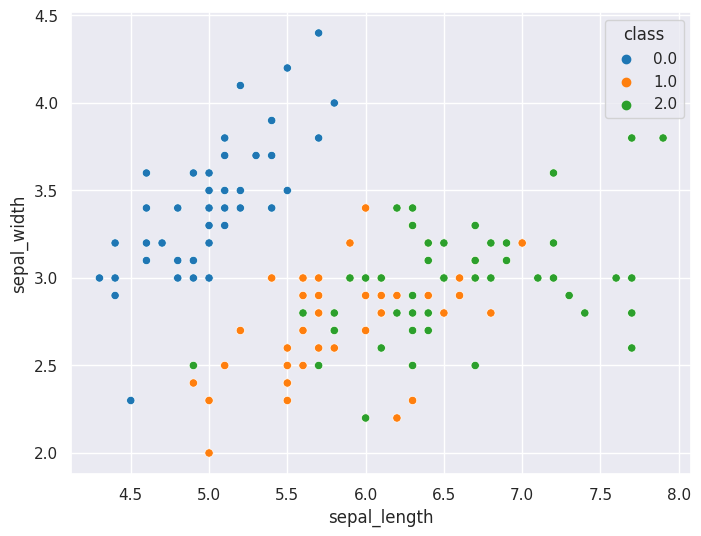

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='class', legend='full', palette='tab10')

<Axes: xlabel='petal_length', ylabel='petal_width'>

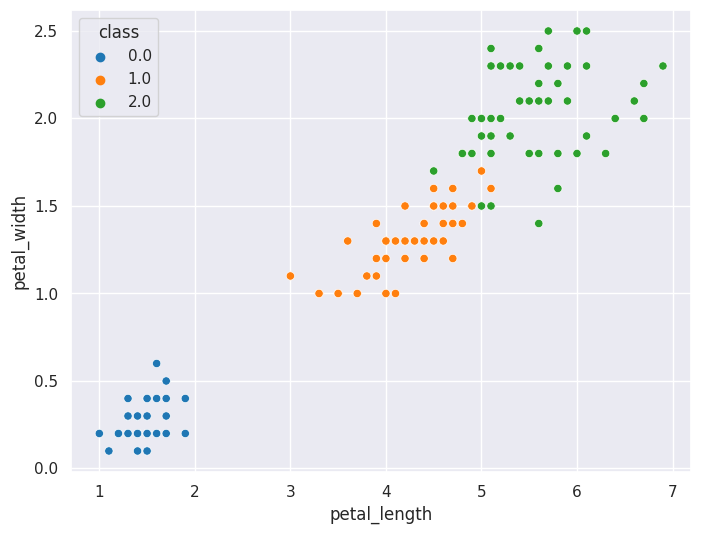

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='class', legend='full', palette='tab10')

In [ ]:
df['class'].value_counts()

0.0    50
1.0    50
2.0    50
Name: class, dtype: int64

In [ ]:
X = df[['petal_length','petal_width']].copy()
y = df['class'].copy()

In [ ]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

In [ ]:
X = X.values # tworzymy tablice np.array
y = y.values.astype('int16')

## Budowa drzewa decyzyjnego

max_depth = 1

In [ ]:
# nie dzielimy danych na train i test, mało danych i robimy dla przykladu
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=30)
classifier.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=30)

Granice decyzyjne

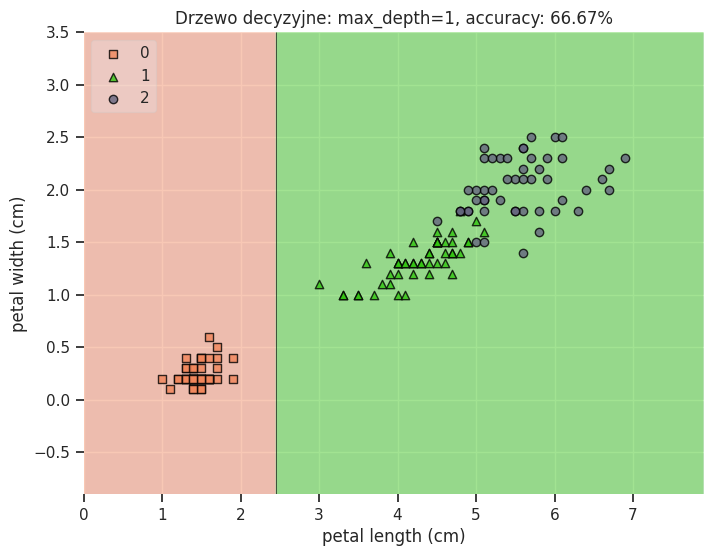

In [ ]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(X, y)

plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, classifier, legend=2, colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
plt.show()

## Graf drzewa decyzyjnego
max_depth = 1

In [ ]:
from sklearn.tree import export_graphviz
# importuje do pliku ,dot z ktorym w sumie srednio jest co zrobic
export_graphviz(classifier, out_file='iris_tree.dot',
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

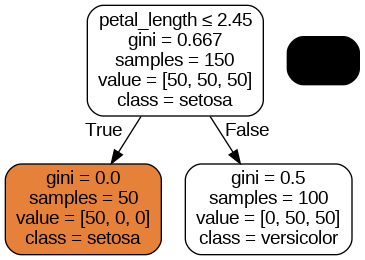

In [ ]:
from six import StringIO
from IPython.display import Image
import pydotplus
# ten kawalek kodu wyswietla drzewo
dot_data = StringIO()
export_graphviz(classifier,
               out_file=dot_data,
               feature_names=feature_names[2:],
               class_names=class_names,
               special_characters=True,
               rounded=True,
               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png(), width=450)

In [ ]:
#dazymy do minimalizacji gini

In [ ]:
# funkcja do budowy i wyswietlania drzewa, zaladam ze wszystkie biblioteki sa zainstalowane
def make_decision_tree(X, y, max_depth=1):

    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=30)
    classifier.fit(X, y)

    # ten kawalek kodu wyswietla graf drzewa
    dot_data = StringIO()
    export_graphviz(classifier,
                out_file=dot_data,
                feature_names=feature_names[2:],
                class_names=class_names,
                special_characters=True,
                rounded=True,
                filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')


    # granice decyzyjne
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

    acc = classifier.score(X, y)

    plt.figure(figsize=(8, 6))
    plot_decision_regions(X, y, classifier, legend=2, colors=colors)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')


    return Image(graph.create_png(), width=450)


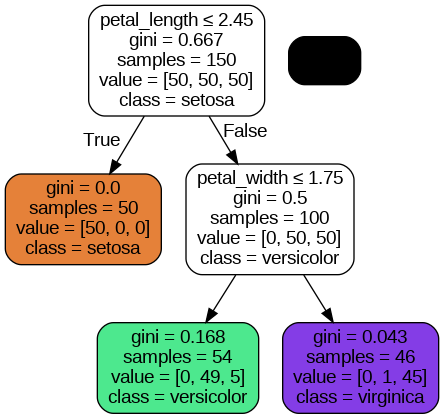

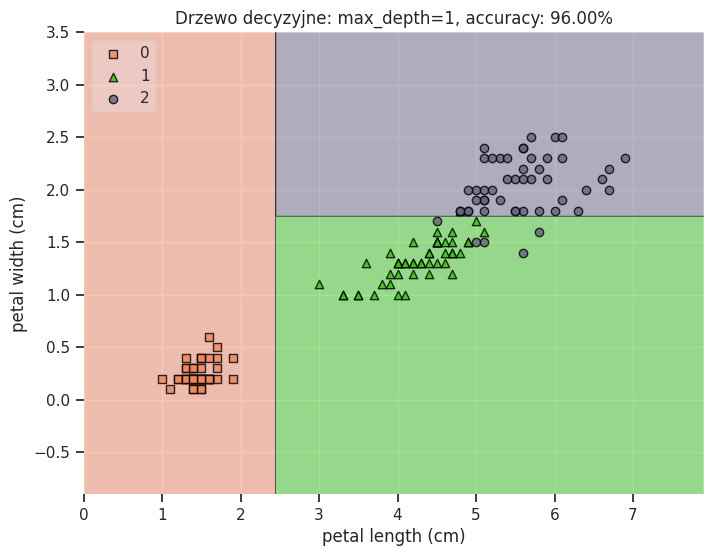

In [ ]:
make_decision_tree(X, y, 2)

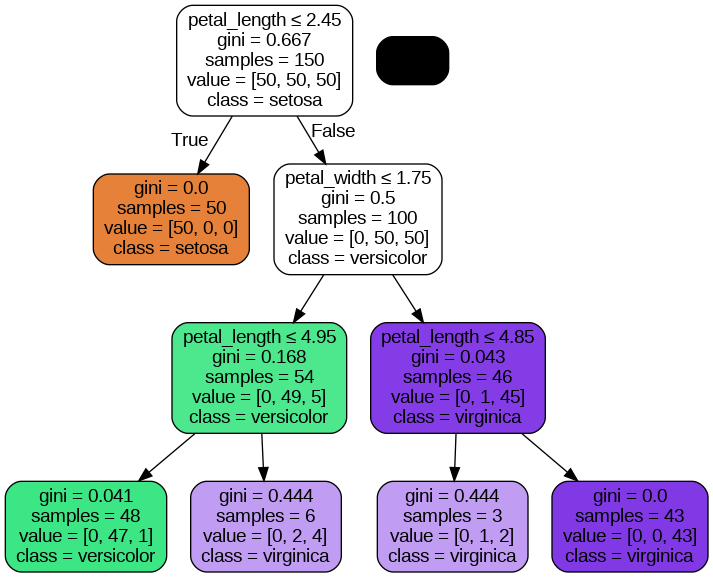

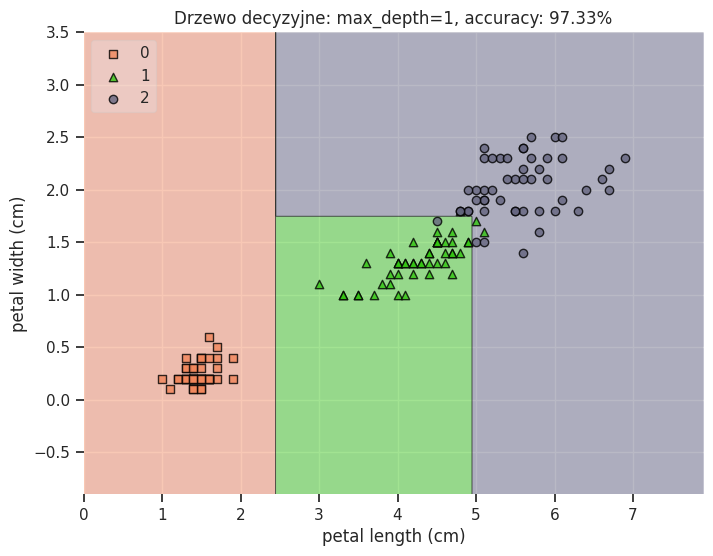

In [ ]:
make_decision_tree(X, y, 3)

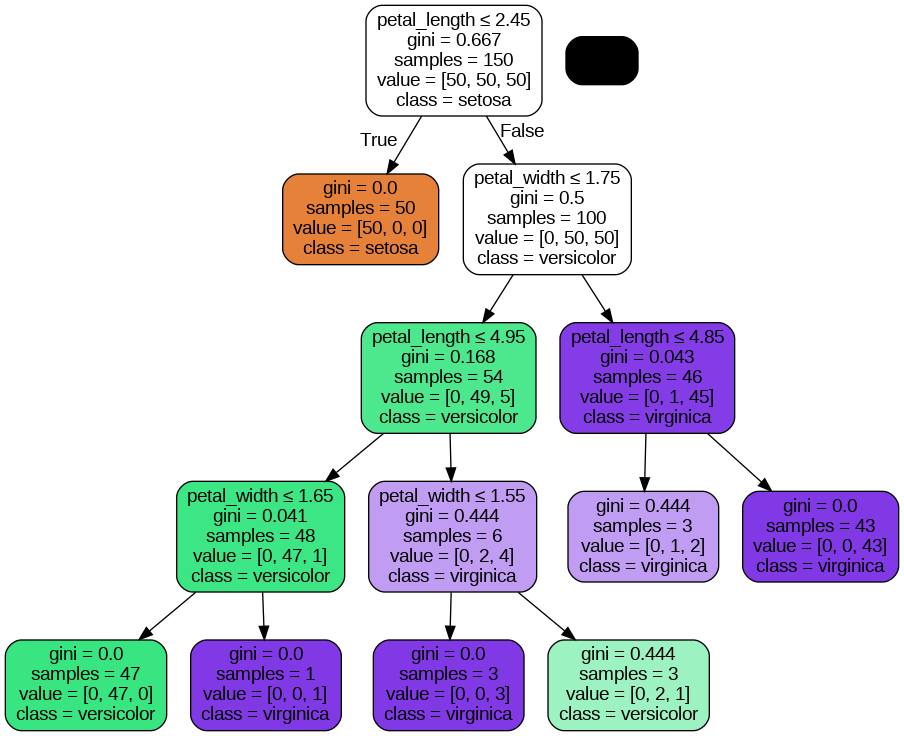

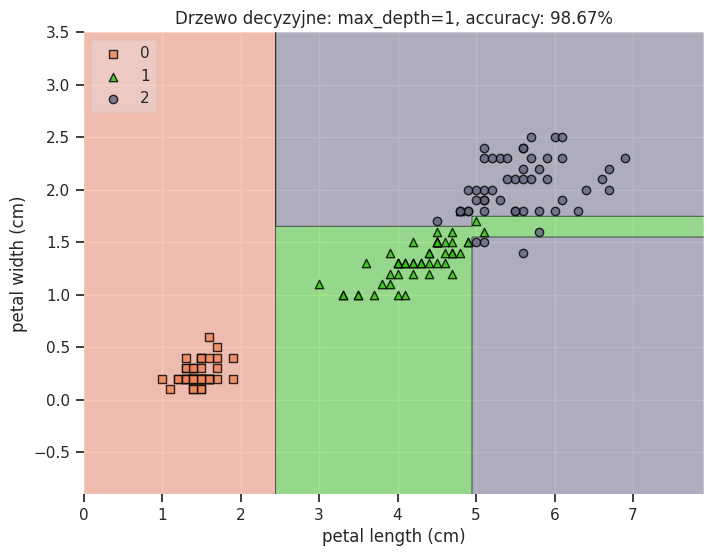

In [ ]:
make_decision_tree(X, y, 4)

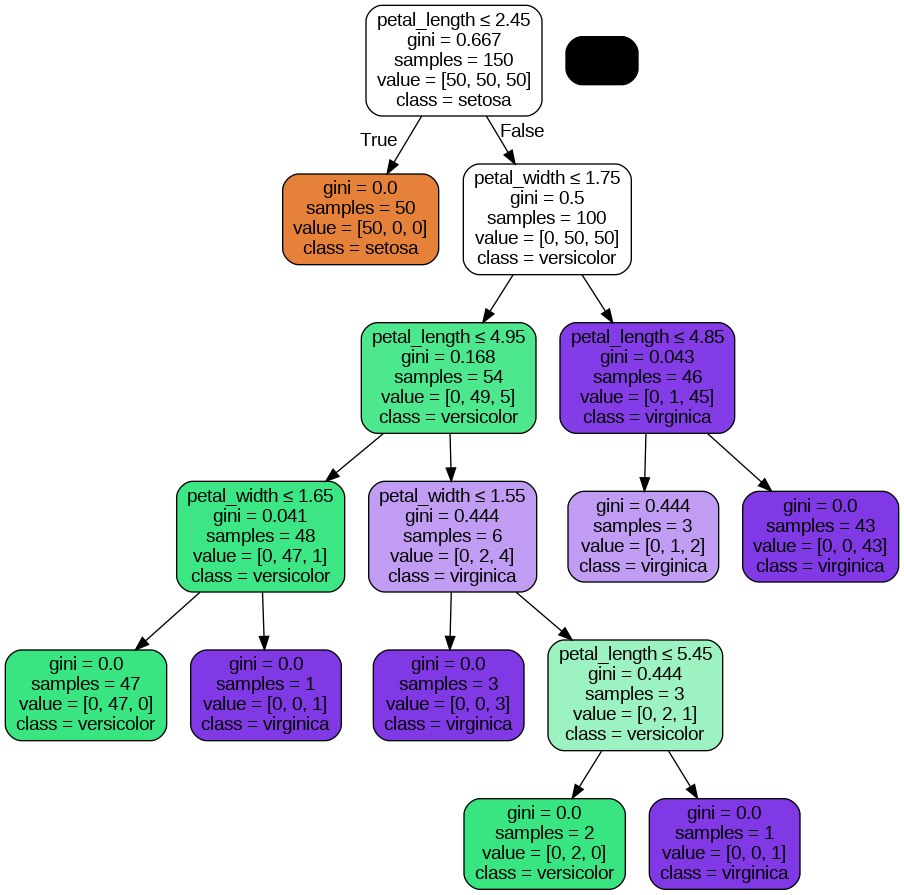

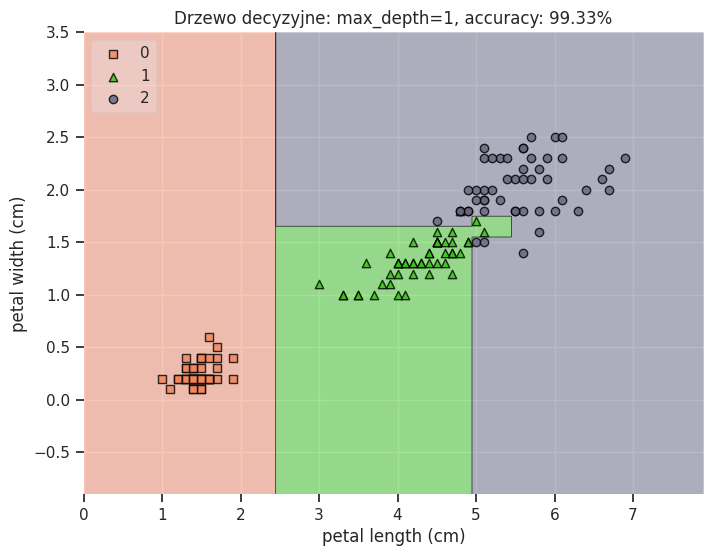

In [ ]:
make_decision_tree(X, y, 5)

In [ ]:
# tutaj w sumie trzeba by sprawdzac na zbiorze testowym zeby te wyniki były
# miarodajne bo tutaj patrzac na dopasowanie do treningowych danych to klasycznie
# bywa overfitting